In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/File/Melbourne_housing_FULL.csv')
data

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.81140,145.01160,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,24/02/2018,6.3,3013.0,...,1.0,3.0,593.0,NaN,NaN,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,24/02/2018,6.3,3013.0,...,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,24/02/2018,6.3,3013.0,...,1.0,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0
34855,Yarraville,12/37 Stephen St,3,h,1140000.0,SP,hockingstuart,24/02/2018,6.3,3013.0,...,NaN,NaN,NaN,NaN,NaN,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

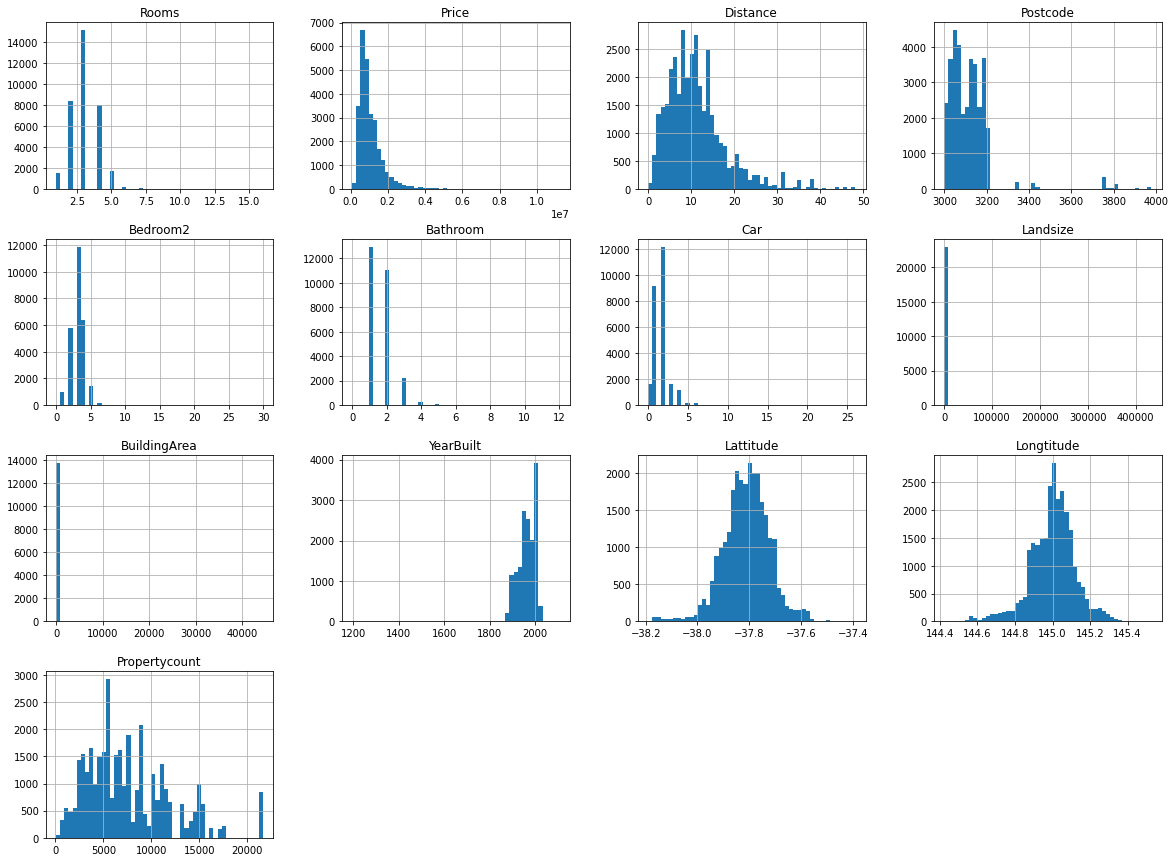

In [ ]:
data.hist(bins=50, figsize=(20,15))
plt.show()

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,34857.0,3.031012e+00,0.969933,1.00000,2.00000,3.0000,4.000000e+00,1.600000e+01
Price,27247.0,1.050173e+06,641467.130105,85000.00000,635000.00000,870000.0000,1.295000e+06,1.120000e+07
Distance,34856.0,1.118493e+01,6.788892,0.00000,6.40000,10.3000,1.400000e+01,4.810000e+01
Postcode,34856.0,3.116063e+03,109.023903,3000.00000,3051.00000,3103.0000,3.156000e+03,3.978000e+03
Bedroom2,26640.0,3.084647e+00,0.980690,0.00000,2.00000,3.0000,4.000000e+00,3.000000e+01
Bathroom,26631.0,1.624798e+00,0.724212,0.00000,1.00000,2.0000,2.000000e+00,1.200000e+01
Car,26129.0,1.728845e+00,1.010771,0.00000,1.00000,2.0000,2.000000e+00,2.600000e+01
Landsize,23047.0,5.935990e+02,3398.841946,0.00000,224.00000,521.0000,6.700000e+02,4.330140e+05
BuildingArea,13742.0,1.602564e+02,401.267060,0.00000,102.00000,136.0000,1.880000e+02,4.451500e+04
YearBuilt,15551.0,1.965290e+03,37.328178,1196.00000,1940.00000,1970.0000,2.000000e+03,2.106000e+03


In [ ]:
data.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

##Chuyen data

In [ ]:
#chuyen doi loai du lieu object sang category
change_type = ['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'CouncilArea','Regionname', 'Postcode']
for catype in change_type:
    data[catype] = data[catype].astype('category')  
#chuyen Date sang datetime
data['Date'] = pd.to_datetime(data['Date'])
data['days'] = data['Date'].dt.day
data['months'] = data['Date'].dt.month
data['years'] = data['Date'].dt.year
data = data.drop(['Date'], 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Suburb         34857 non-null  category
 1   Address        34857 non-null  category
 2   Rooms          34857 non-null  int64   
 3   Type           34857 non-null  category
 4   Price          27247 non-null  float64 
 5   Method         34857 non-null  category
 6   SellerG        34857 non-null  category
 7   Distance       34856 non-null  float64 
 8   Postcode       34856 non-null  category
 9   Bedroom2       26640 non-null  float64 
 10  Bathroom       26631 non-null  float64 
 11  Car            26129 non-null  float64 
 12  Landsize       23047 non-null  float64 
 13  BuildingArea   13742 non-null  float64 
 14  YearBuilt      15551 non-null  float64 
 15  CouncilArea    34854 non-null  category
 16  Lattitude      26881 non-null  float64 
 17  Longtitude     26881 non-null  

##Mising Value

In [ ]:
data.dropna(inplace = True) #drop het cac gia tri NaN
data.isnull().sum(), data.shape

(Suburb           0
 Address          0
 Rooms            0
 Type             0
 Price            0
 Method           0
 SellerG          0
 Distance         0
 Postcode         0
 Bedroom2         0
 Bathroom         0
 Car              0
 Landsize         0
 BuildingArea     0
 YearBuilt        0
 CouncilArea      0
 Lattitude        0
 Longtitude       0
 Regionname       0
 Propertycount    0
 days             0
 months           0
 years            0
 dtype: int64, (8887, 23))

In [ ]:
# fig, ax = plt.subplots(figsize=(10,10))
# heat_map = sns.heatmap( cmap = 'jet', annot=True)

##Outliner

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


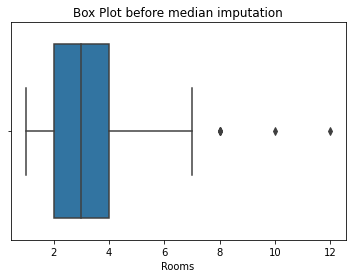

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


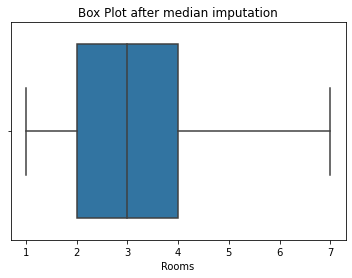

In [ ]:
sns.boxplot(data['Rooms'])
plt.title("Box Plot before median imputation")
plt.show()
q1 = data['Rooms'].quantile(0.25)
q3 = data['Rooms'].quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
med = np.median(data['Rooms'])
for i in data['Rooms']:
    if i > Upper_tail or i < Lower_tail:
            data['Rooms'] = data['Rooms'].replace(i, med)
sns.boxplot(data['Rooms'])
plt.title("Box Plot after median imputation")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


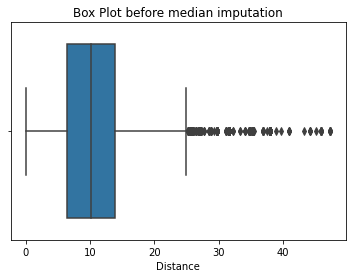

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


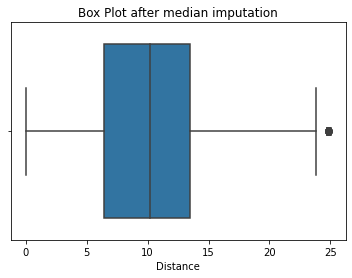

In [ ]:
sns.boxplot(data['Distance'])
plt.title("Box Plot before median imputation")
plt.show()
q1 = data['Distance'].quantile(0.25)
q3 = data['Distance'].quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
med = np.median(data['Distance'])
for i in data['Distance']:
    if i > Upper_tail or i < Lower_tail:
            data['Distance'] = data['Distance'].replace(i, med)
sns.boxplot(data['Distance'])
plt.title("Box Plot after median imputation")
plt.show()  

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


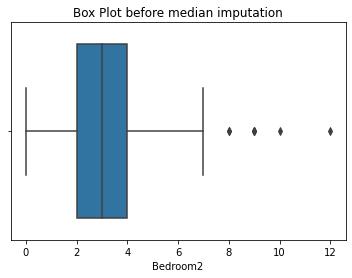

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


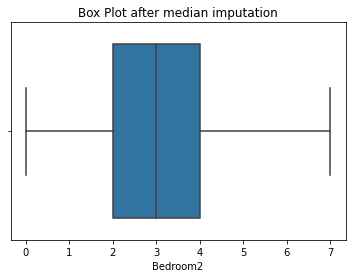

In [ ]:
sns.boxplot(data['Bedroom2'])
plt.title("Box Plot before median imputation")
plt.show()
q1 = data['Bedroom2'].quantile(0.25)
q3 = data['Bedroom2'].quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
med = np.median(data['Bedroom2'])
for i in data['Bedroom2']:
    if i > Upper_tail or i < Lower_tail:
            data['Bedroom2'] = data['Bedroom2'].replace(i, med)
sns.boxplot(data['Bedroom2'])
plt.title("Box Plot after median imputation")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


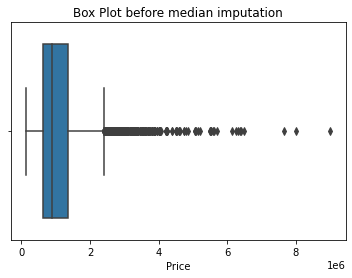

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


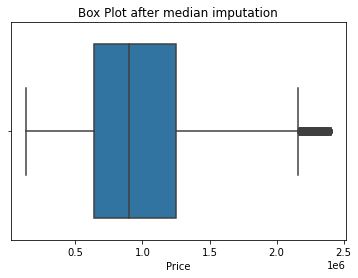

In [ ]:
sns.boxplot(data['Price'])
plt.title("Box Plot before median imputation")
plt.show()
q1 = data['Price'].quantile(0.25)
q3 = data['Price'].quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
med = np.median(data['Price'])
for i in data['Price']:
    if i > Upper_tail or i < Lower_tail:
            data['Price'] = data['Price'].replace(i, med)
sns.boxplot(data['Price'])
plt.title("Box Plot after median imputation")
plt.show()  

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


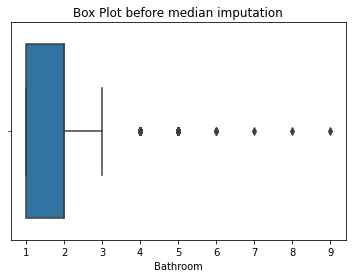

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


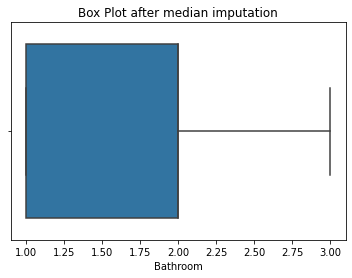

In [ ]:
sns.boxplot(data['Bathroom'])
plt.title("Box Plot before median imputation")
plt.show()
q1 = data['Bathroom'].quantile(0.25)
q3 = data['Bathroom'].quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
med = np.median(data['Bathroom'])
for i in data['Bathroom']:
    if i > Upper_tail or i < Lower_tail:
            data['Bathroom'] = data['Bathroom'].replace(i, med)
sns.boxplot(data['Bathroom'])
plt.title("Box Plot after median imputation")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


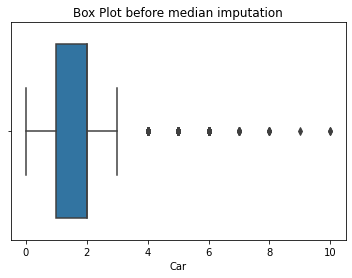

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


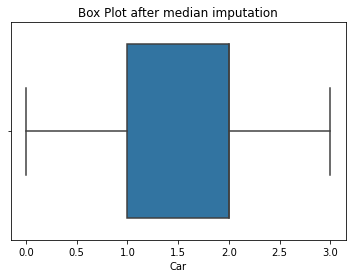

In [ ]:
sns.boxplot(data['Car'])
plt.title("Box Plot before median imputation")
plt.show()
q1 = data['Car'].quantile(0.25)
q3 = data['Car'].quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
med = np.median(data['Car'])
for i in data['Car']:
    if i > Upper_tail or i < Lower_tail:
            data['Car'] = data['Car'].replace(i, med)
sns.boxplot(data['Car'])
plt.title("Box Plot after median imputation")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


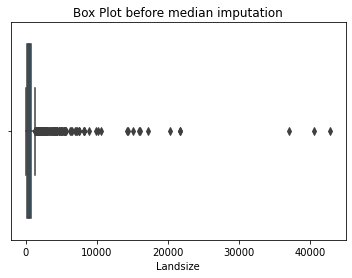

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


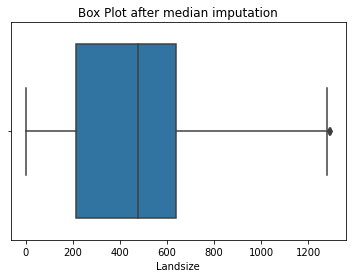

In [ ]:
sns.boxplot(data['Landsize'])
plt.title("Box Plot before median imputation")
plt.show()
q1 = data['Landsize'].quantile(0.25)
q3 = data['Landsize'].quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
med = np.median(data['Landsize'])
for i in data['Landsize']:
    if i > Upper_tail or i < Lower_tail:
            data['Landsize'] = data['Landsize'].replace(i, med)
sns.boxplot(data['Landsize'])
plt.title("Box Plot after median imputation")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


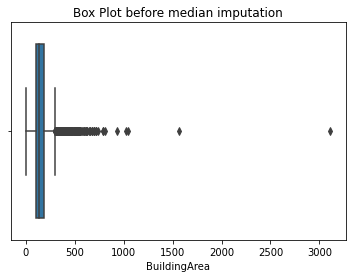

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


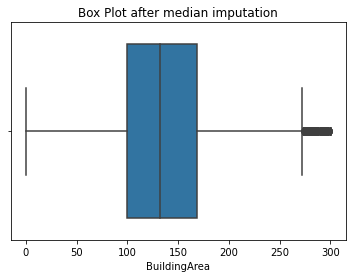

In [ ]:
sns.boxplot(data['BuildingArea'])
plt.title("Box Plot before median imputation")
plt.show()
q1 = data['BuildingArea'].quantile(0.25)
q3 = data['BuildingArea'].quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
med = np.median(data['BuildingArea'])
for i in data['BuildingArea']:
    if i > Upper_tail or i < Lower_tail:
            data['BuildingArea'] = data['BuildingArea'].replace(i, med)
sns.boxplot(data['BuildingArea'])
plt.title("Box Plot after median imputation")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


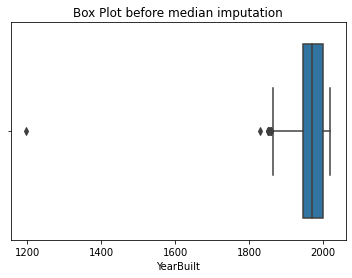

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


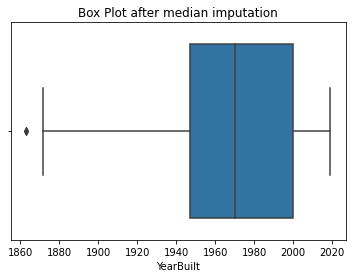

In [ ]:
sns.boxplot(data['YearBuilt'])
plt.title("Box Plot before median imputation")
plt.show()
q1 = data['YearBuilt'].quantile(0.25)
q3 = data['YearBuilt'].quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
med = np.median(data['YearBuilt'])
for i in data['YearBuilt']:
    if i > Upper_tail or i < Lower_tail:
            data['YearBuilt'] = data['YearBuilt'].replace(i, med)
sns.boxplot(data['YearBuilt'])
plt.title("Box Plot after median imputation")
plt.show() 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


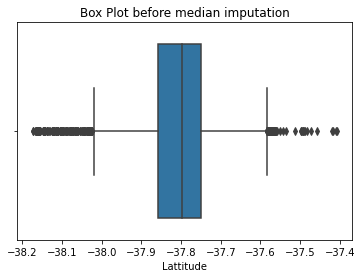

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


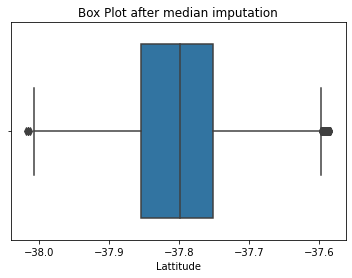

In [ ]:
sns.boxplot(data['Lattitude'])
plt.title("Box Plot before median imputation")
plt.show()
q1 = data['Lattitude'].quantile(0.25)
q3 = data['Lattitude'].quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
med = np.median(data['Lattitude'])
for i in data['Lattitude']:
    if i > Upper_tail or i < Lower_tail:
            data['Lattitude'] = data['Lattitude'].replace(i, med)
sns.boxplot(data['Lattitude'])
plt.title("Box Plot after median imputation")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


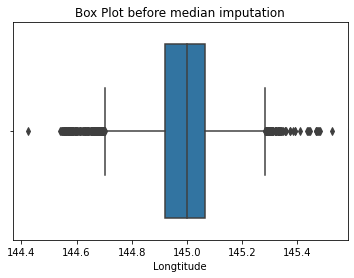

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


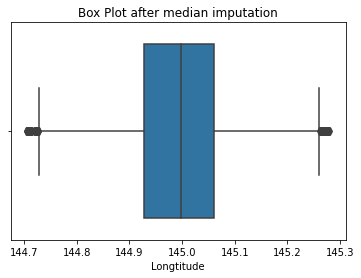

In [ ]:
sns.boxplot(data['Longtitude'])
plt.title("Box Plot before median imputation")
plt.show()
q1 = data['Longtitude'].quantile(0.25)
q3 = data['Longtitude'].quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
med = np.median(data['Longtitude'])
for i in data['Longtitude']:
    if i > Upper_tail or i < Lower_tail:
            data['Longtitude'] = data['Longtitude'].replace(i, med)
sns.boxplot(data['Longtitude'])
plt.title("Box Plot after median imputation")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


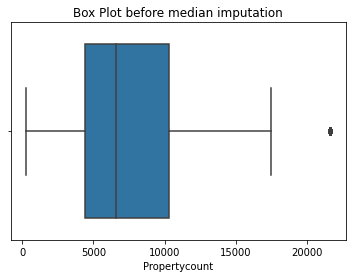

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


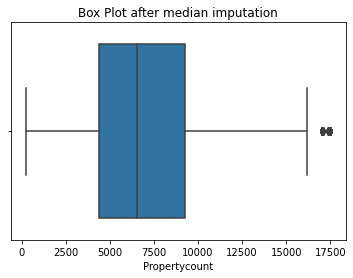

In [ ]:
sns.boxplot(data['Propertycount'])
plt.title("Box Plot before median imputation")
plt.show()
q1 = data['Propertycount'].quantile(0.25)
q3 = data['Propertycount'].quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
med = np.median(data['Propertycount'])
for i in data['Propertycount']:
    if i > Upper_tail or i < Lower_tail:
            data['Propertycount'] = data['Propertycount'].replace(i, med)
sns.boxplot(data['Propertycount'])
plt.title("Box Plot after median imputation")
plt.show()

##Training data


In [ ]:
X = data[['Rooms', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude', 'Propertycount', 'days', 'months', 'years']]
y = data['Price']

scaler = MinMaxScaler()
x = scaler.fit_transform(X)
y = scaler.fit_transform(np.array(y).reshape(-1, 1))

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X , y , test_size = 0.2 , random_state = 42)

In [ ]:
x_train.shape, x_test.shape

((7109, 14), (1778, 14))

In [ ]:
# lr = LinearRegression()
# lr.fit(x_train, y_train)

# y_pred = lr.predict(x_test)

In [ ]:
# loss_draw = y_pred - y_test

In [ ]:
# sns.displot(data = loss_draw)

##Danh gia

In [ ]:
# metrics.mean_squared_error(y_test, y_pred)

In [ ]:
# metrics.median_absolute_error(y_test, y_pred)

In [ ]:
# metrics.r2_score(y_test, y_pred)

##Keras

In [ ]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras import optimizers

In [ ]:
model = Sequential([Dense(20, activation='relu')])
model = Sequential([Dense(10, activation='relu')])
model = Sequential([Dense(6, activation='linear')])
model = Sequential([Dense(3, activation='linear')])
model = Sequential([Dense(1, activation='linear')])

model.compile(loss='mse', optimizer='adam', metrics = ['mse', 'mae'])

In [ ]:
history = model.fit(x_train, y_train, epochs= 200, validation_split=0.2)

Epoch 1/200
178/178 [==============================] - 1s 3ms/step - loss: 3549107.7500 - mse: 3549107.7500 - mae: 1404.2814 - val_loss: 1806696.2500 - val_mse: 1806696.2500 - val_mae: 1037.6097
Epoch 2/200
178/178 [==============================] - 0s 2ms/step - loss: 1180119.2500 - mse: 1180119.2500 - mae: 868.2017 - val_loss: 1019465.3750 - val_mse: 1019465.3750 - val_mae: 839.0877
Epoch 3/200
178/178 [==============================] - 1s 3ms/step - loss: 818780.0000 - mse: 818780.0000 - mae: 756.0563 - val_loss: 738384.3125 - val_mse: 738384.3125 - val_mae: 722.7943
Epoch 4/200
178/178 [==============================] - 1s 3ms/step - loss: 587074.3125 - mse: 587074.3125 - mae: 643.5596 - val_loss: 512176.7500 - val_mse: 512176.7500 - val_mae: 602.1693
Epoch 5/200
178/178 [==============================] - 0s 2ms/step - loss: 396786.7188 - mse: 396786.7188 - mae: 529.3721 - val_loss: 334561.3750 - val_mse: 334561.3750 - val_mae: 487.2373
Epoch 6/200
178/178 [========================

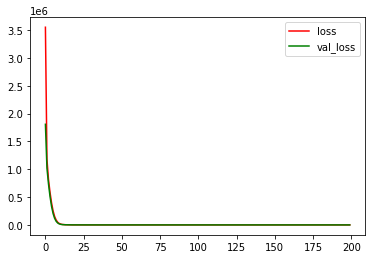

In [ ]:
history_df = pd.DataFrame(history.history)
plt.plot(history_df['loss'], 'r', label = 'loss')
plt.plot(history_df['val_loss'], 'g', label='val_loss')
plt.legend()

In [ ]:
model.evaluate(x_test, y_test)

56/56 [==============================] - 0s 1ms/step - loss: 0.0533 - mse: 0.0533 - mae: 0.1906


[0.053335968405008316, 0.053335968405008316, 0.19057752192020416]

In [ ]:
model.evaluate(x_train, y_train)

223/223 [==============================] - 0s 1ms/step - loss: 0.0533 - mse: 0.0533 - mae: 0.1904


[0.053337257355451584, 0.053337257355451584, 0.19037574529647827]

In [ ]:
#gop lai giam so chieu ma tran thua trong one hot
#thay Standard hay normalize